# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random
import plotly.io as pio

import networkx as nx

In [2]:
seed = 16
random.seed(seed)
np.random.seed(seed)

#esto es para forzar a plt a poner fondos blancos en las figuras aunque el tema del notebook sea oscuro
#plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams['figure.facecolor'] = 'white'
cmap = plt.get_cmap("tab10")
pio.templates.default = "seaborn"

sns.set_style("darkgrid", rc={'xtick.bottom': True})

In [3]:
data_processed = "../../../data/processed/"
data_interim = "../../../data/interim/"
data_external = "../../../data/external/"
graph_data = data_processed + "graph_data_nohubs/"
reports_comunidades = "../../../reports/reports_nohubs/analisis_comunidades/"
reports_genes = "../../../reports/reports_nohubs/analisis_red_genes/"

In [4]:
graph_node_data = pd.read_csv(graph_data+"nohub_graph_node_data.csv")
infomap_results = pd.read_csv(reports_genes+"infomap_gene_sim.csv")
louvain_results = pd.read_csv(reports_genes+"louvain_gene_sim.csv")

infomap_degree = pd.read_csv(reports_comunidades+"grado_gda_infomap.csv")
louvain_degree = pd.read_csv(reports_comunidades+"grado_gda_louvain.csv")

In [17]:
infomap_data = infomap_degree.merge(infomap_results, right_on="comunidades_infomap",left_on="comunidad").drop(columns="comunidades_infomap")
infomap_data

,comunidad,tamaño,fraccion_gda,grado_gda_medio,max_grado_gda,mean_sim_jaccard_1,mean_sim_overlap_1,mean_sim_jaccard_3,mean_sim_overlap_3
0,382,82,0.79,1.74,12.0,0.01,0.04,0.02,0.07
1,184,74,0.99,1.75,24.0,0.00,0.01,0.03,0.12
2,332,74,0.93,2.54,104.0,0.00,0.03,0.12,0.35
3,353,71,0.75,3.26,37.0,0.02,0.12,0.09,0.34
4,379,68,0.97,1.21,14.0,0.00,0.01,0.01,0.03
...,...,...,...,...,...,...,...,...,...
1143,1091,2,0.50,4.00,4.0,NaN,NaN,NaN,NaN
1144,891,2,1.00,3.00,4.0,0.00,0.00,0.02,0.15
1145,1140,2,1.00,1.00,1.0,1.00,1.00,1.00,1.00
1146,889,2,0.50,6.00,6.0,NaN,NaN,NaN,NaN


In [15]:
louvain_data = louvain_degree.merge(louvain_results, right_on="comunidades_louvain",left_on="comunidad").drop(columns="comunidades_louvain")
louvain_data

,comunidad,tamaño,fraccion_gda,grado_gda_medio,max_grado_gda,mean_sim_jaccard_1,mean_sim_overlap_1,mean_sim_jaccard_3,mean_sim_overlap_3
0,3,702,0.33,41.15,1074.0,0.01,0.09,0.11,0.47
1,18,369,0.62,4.12,75.0,0.01,0.02,0.02,0.08
2,16,333,0.37,7.38,110.0,0.01,0.02,0.05,0.25
3,33,304,0.23,3.58,52.0,0.01,0.03,0.06,0.21
4,14,304,0.63,4.35,205.0,0.01,0.02,0.02,0.10
...,...,...,...,...,...,...,...,...,...
289,262,2,0.50,1.00,1.0,NaN,NaN,NaN,NaN
290,264,2,1.00,1.00,1.0,0.00,0.00,0.05,0.27
291,265,2,0.50,8.00,8.0,NaN,NaN,NaN,NaN
292,266,2,1.00,2.50,4.0,0.00,0.00,0.00,0.08


# Jaccard de genes compartidos

Ver para clusters asociados con cancer. Ver para casos no nulos (dirección inversa).

Text(0.5, 1.0, 'Louvain')

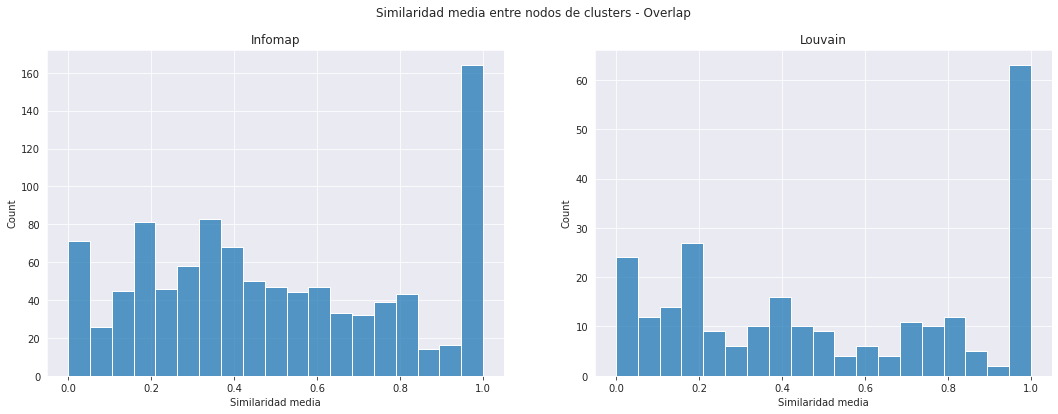

In [19]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
fig.suptitle(f"Similaridad media entre nodos de clusters - Overlap")

sns.histplot(data=infomap_data["mean_sim_overlap_3"], ax=ax[0], bins=np.linspace(0,1,20))
ax[0].set_xlabel("Similaridad media")
ax[0].set_title("Infomap")

sns.histplot(data=louvain_data["mean_sim_overlap_3"], ax=ax[1],bins=np.linspace(0,1,20))
ax[1].set_xlabel("Similaridad media")
ax[1].set_title("Louvain")

Text(0.5, 1.0, 'Louvain')

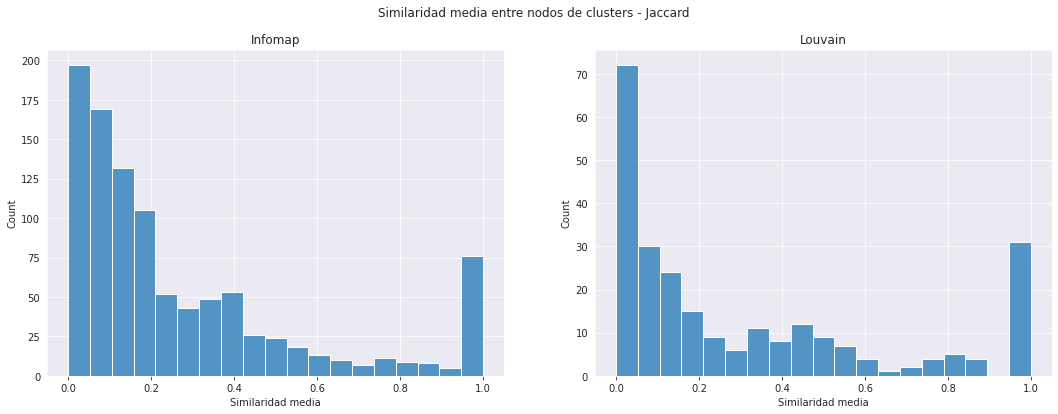

In [20]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
fig.suptitle(f"Similaridad media entre nodos de clusters - Jaccard")

sns.histplot(data=infomap_data["mean_sim_jaccard_3"], ax=ax[0], bins=np.linspace(0,1,20))
ax[0].set_xlabel("Similaridad media")
ax[0].set_title("Infomap")

sns.histplot(data=louvain_data["mean_sim_jaccard_3"], ax=ax[1],bins=np.linspace(0,1,20))
ax[1].set_xlabel("Similaridad media")
ax[1].set_title("Louvain")

# Supergrafico

In [21]:
infomap_data.columns

Index(['comunidad', 'tamaño', 'fraccion_gda', 'grado_gda_medio',
       'max_grado_gda', 'mean_sim_jaccard_1', 'mean_sim_overlap_1',
       'mean_sim_jaccard_3', 'mean_sim_overlap_3'],
      dtype='object')

In [33]:
case_dict = {1:"Genes",3:"Primeros vecinos"}

def supergrafico(df,metric,i,titulo):
    meansim_col = f"mean_sim_{metric}_{i}"
    frac_col = "fraccion_gda"
    size_col = "tamaño"
    fig = px.scatter(df, x=size_col, y=meansim_col,width=1000, height=600, title=f"Fracción GDA vs similaridad media vs tamaño - {titulo}",marginal_x="histogram",marginal_y="histogram",range_y=[0,1])
    fig.update_layout(xaxis_title="Tamaño", yaxis_title=f"Similaridad media - {case_dict[i]}")

    fig.show()

# Veo clusters específicos

In [50]:
cols = ["comunidad","tamaño","mean_sim_lsa_0","entropia_0","top_monogram","top_5_monogram","top_monogram_score","top_5_monogram_score","top_trigram","top_bigram"]
infomap_summary = pd.read_pickle("../../../reports/reports_nohubs/infomap_summary.pkl")[cols]
louvain_summary = pd.read_pickle("../../../reports/reports_nohubs/louvain_summary.pkl")[cols]

In [51]:
infomap_summary[infomap_summary.top_5_monogram.apply(lambda x: "cancer" in x)]

,comunidad,tamaño,mean_sim_lsa_0,entropia_0,top_monogram,top_5_monogram,top_monogram_score,top_5_monogram_score,top_trigram,top_bigram
180,242,17,0.19,0.61,melanoma,"[melanoma, tumor, cancer, predisposition, heal]",0.29,"[0.29, 0.25, 0.23, 0.23, 0.23]",multiple_self_heal,self_heal
230,15,15,0.68,0.44,breast,"[breast, carcinoma, cancer, tumor, brca1]",0.79,"[0.79, 0.36, 0.19, 0.14, 0.14]",breast_ovarian_cancer,breast_carcinoma
242,5,15,0.77,0.35,prostate,"[prostate, carcinoma, cancer, familial, heredi...",0.89,"[0.89, 0.23, 0.22, 0.12, 0.11]",cancer_cause_mutation,prostate_cancer
381,104,11,0.24,0.50,vulva,"[vulva, vulvar, li, melanoma, cancer]",0.66,"[0.66, 0.54, 0.17, 0.17, 0.12]",unknown_etiology_affect,affect_vulva
429,28,10,0.50,0.46,bladder,"[bladder, carcinoma, squamous, urinary, cancer]",0.82,"[0.82, 0.36, 0.13, 0.11, 0.11]",squamous_cell_carcinoma,cell_carcinoma
503,628,9,0.78,0.44,colorectal,"[colorectal, cancer, nonpolyposis, carcinoma, ...",0.42,"[0.42, 0.4, 0.33, 0.31, 0.26]",hereditary_nonpolyposis_colon,hereditary_nonpolyposis
537,516,9,0.96,0.22,ovarian,"[ovarian, breast, cancer, susceptibility, fami...",0.59,"[0.59, 0.54, 0.39, 0.27, 0.21]",breast_ovarian_cancer,breast_ovarian
680,93,7,0.33,0.44,peritoneal,"[peritoneal, leiomyoma, cancer, smooth, benign]",0.47,"[0.47, 0.32, 0.27, 0.24, 0.24]",smooth_muscle_cell,cell_cancer
780,836,6,0.99,0.20,nonpolyposis,"[nonpolyposis, colorectal, hereditary, cancer,...",0.79,"[0.79, 0.33, 0.31, 0.29, 0.25]",cancer_hereditary_nonpolyposis,hereditary_nonpolyposis
798,627,5,0.98,0.13,colorectal,"[colorectal, cancer, susceptibility, pole, pap...",0.85,"[0.85, 0.41, 0.3, 0.1, 0.0]",cancer_cause_mutation,colorectal_cancer


In [58]:
ejemplo = 15
infomap_data[infomap_data.comunidad == ejemplo]

,comunidad,tamaño,fraccion_gda,grado_gda_medio,max_grado_gda,mean_sim_jaccard_1,mean_sim_overlap_1,mean_sim_jaccard_3,mean_sim_overlap_3
230,15,15,0.4,98.5,538.0,0.11,0.59,0.18,0.74


# Visualizaciones

In [39]:
all_data_infomap = pd.merge(infomap_clusters, conectividad_infomap, left_on="comunidad", right_on="comunidad")

def facet_range(x):
    if x <= 0.3:
        return 1
    elif x <= 0.6:
        return 2
    else:
        return 3

all_data_infomap["rangos_fraccion"] =  all_data_infomap.fraccion_gda.apply(lambda x: facet_range(x))

In [42]:
fig = px.histogram(all_data_infomap, x="mean_overlap_coef", facet_col="rangos_fraccion")
fig.show()

Definir una función que, dado un cluster, me muestre el df con los nodos, los puntajes de overlap y jaccard, un diagrama de venn y las estadísticas de tfidf con los términos. ( O juntar todo esto en una celda para cuando lo quiera mostrar)

Cociente entre la media jaccard del cluster vs jaccard control.

Control: 
Hago distribución GDA de nodos enfermedad y bineo logaritmico.

Para cada cluster me fijo qué distribución tiene (tiene n nodos de cada bin) y tomo la misma cantidad de nodos con esa distribución.

Comparo (cociente) el coef de jaccard de esos dos clusters

Binear con una lista de potencias de 2

Ver primeros vecinos:

Conjunto de genes asociados + los primeros vecinos de esos genes

Hacer control también

Sacar de la red DD los que no tienen GDA, hacer clustering de nuevo y ver estas cuentas